#Project Setup
This section handles the installation of necessary packages. The notebook begins by ensuring that selenium and webdriver-manager are available, which are crucial for web scraping.

In [1]:
# Installing Selenium for web scraping and WebDriver Manager for managing browser drivers
pip install selenium webdriver-manager

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 42.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.7/481.7 kB 12.9 MB/s eta 0:00:00


In [ ]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [ ]:
!pip install pdfminer.six
!pip install docx2txt
!pip install unidecode
!pip install contractions

  Attempting uninstall: cryptography
    Found existing installation: cryptography 3.4.8
    Uninstalling cryptography-3.4.8:
      Successfully uninstalled cryptography-3.4.8
  Created wheel for docx2txt: filename=docx2txt-0.8-py3-none-any.whl size=3984 sha256=2a105ed31c459c98c6d8e45bfe3f9963d41585f754119cc5d14ef61e6623317f
  Stored in directory: c:\users\dell 7400 i7\appdata\local\pip\cache\wheels\40\75\01\e6c444034338bde9c7947d3467807f889123465c2371e77418
Successfully built docx2txt


#Importing Libraries
Import essential libraries for web scraping using Selenium. This includes various services to manage Chrome, Edge, Firefox, and IE browser sessions.

In [ ]:
import pytest
from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from selenium.webdriver.edge.service import Service as EdgeService
from selenium.webdriver.firefox.service import Service as FirefoxService
from selenium.webdriver.ie.service import Service as IEService
from webdriver_manager.chrome import ChromeDriverManager
from webdriver_manager.firefox import GeckoDriverManager
from webdriver_manager.microsoft import EdgeChromiumDriverManager
from webdriver_manager.microsoft import IEDriverManager

In [ ]:
import nltk
import pandas as pd
import unidecode
import re
import contractions

#Testing Browser Driver Setup (Optional)
These cells contain tests to verify that various browser drivers can be installed and run. This section may be unnecessary for the final project presentation but is helpful for setup testing.

In [ ]:
@pytest.mark.skip(reason="Do not run in CI")
def test_driver_manager_chrome():
    service = ChromeService(executable_path=ChromeDriverManager().install())

    driver = webdriver.Chrome(service=service)

    driver.quit()


@pytest.mark.skip(reason="Do not run in CI")
def test_edge_session():
    service = EdgeService(executable_path=EdgeChromiumDriverManager().install())

    driver = webdriver.Edge(service=service)

    driver.quit()


@pytest.mark.skip(reason="Do not run in CI")
def test_firefox_session():
    service = FirefoxService(executable_path=GeckoDriverManager().install())

    driver = webdriver.Firefox(service=service)

    driver.quit()


@pytest.mark.skip(reason="Do not run in CI")
def test_ie_session():
    service = IEService(executable_path=IEDriverManager().install())

    driver = webdriver.Ie(service=service)

    driver.quit()

#Data Collection - Web Scraping
Use Selenium to scrape data from a website. This section will open a browser window, navigate to the specified URL, and collect required data from web elements and store it in csv file on machine.

We will Collect data for revenue generating assets in 1 file and non revenue generating assets in another file.

In [ ]:
#imporitng the libraries required for scraping
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager

In [ ]:
#imporitng the libraries required for scraping
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service as ChromeService
from selenium.webdriver.chrome.options import Options
import time

In [ ]:
#imporitng the libraries required for scraping
from bs4 import BeautifulSoup

In [ ]:
data_list = []

for number in range (1,10,1):

    url = 'https://flippa.com/buy/sitetype/blog?search_template=most_relevant&page%5Bsize%5D=100&filter%5Bsale_method%5D=auction,classified&filter%5Bstatus%5D=open,won&filter%5Bproperty_type%5D=website&filter%5Bsitetype%5D=blog&filter%5Brevenue_generating%5D=F&page%5Bnumber%5D=' + str(number)
#     url = 'https://flippa.com/buy/sitetype/blog?search_template=most_relevant&page%5Bsize%5D=100&filter%5Bsale_method%5D=auction,classified&filter%5Bstatus%5D=open,won&filter%5Bproperty_type%5D=website&filter%5Bsitetype%5D=blog&filter%5Brevenue_generating%5D=T&page%5Bnumber%5D=' + str(number)

    driver = webdriver.Chrome(ChromeDriverManager().install())
#     options = Options()
#     options.headless = True

#     driver = webdriver.Chrome(options=options, service=ChromeService(ChromeDriverManager().install()))
    driver.get(url)
#     time.sleep(20)


    driver.implicitly_wait(0.5)
    soup = BeautifulSoup(driver.page_source, "html.parser")



    a_tags = soup.find_all('a', class_="card-title")

    divs = set()

    for a in a_tags:
        list_id = a.get('href')
        # slicing the string to get the list_id from the whole href
        list_id = list_id[1:9]

        #divs containg contant have to id 'listing-########'
        # we are getting those divs and adding them to them to divs set
        divs.add(soup.find('div', id='listing-'+str(list_id)))

    # now from each div extect the data we need and stre it as an object
    for div in divs:
        data_divs = div.find_all('div', class_="ng-binding")
        data_span = div.find('span', class_="ng-binding")

        #print(data_span)

        list_item = {
            'name': data_divs[0].text,
            'type': data_divs[1].text,
            'industry': data_divs[2].text,
            'monitization': data_divs[3].text,
            'selling_method': data_divs[4].text,
            'site_age_in_years': data_divs[5].text,
            'net_profit_in_dollar_per_month': data_span.text,
            #'net_profit2': data_span[1].text,
            'price_in_dollars': data_divs[7].text
        }


        #creating a list of objects
        data_list.append(list_item)

    #closing the window in the current loop
    driver.close()


In [ ]:
print(len(data_list))

899


In [ ]:
import pandas as pd
df = pd.DataFrame(data_list)

print(df.head)

<bound method NDFrame.head of                                                   name     type  \
0    \n                    holidaymojacar.com\n    ...  Content   
1    \n                    FashionBirds.net\n      ...  Content   
2    \n                    headfordreams.com\n     ...  Content   
3    \n                    Cannabis Sensei\n       ...  Content   
4    \n                    expertportals.com\n     ...  Content   
..                                                 ...      ...   
894  \n                    Super turnkey business o...  Content   
895  \n                    PNW News\n              ...  Content   
896  \n                    Architecture & Hygiene\n...  Content   
897  \n                    liveunitedsports.com\n  ...  Content   
898  \n                    covid411.com\n          ...     Blog   

               industry     monitization selling_method site_age_in_years  \
0                Travel              Ads       Site Age          11 years   
1      Desi

In [ ]:
df['name'] = df['name'].str.strip()

In [ ]:
df

,name,type,industry,monitization,selling_method,site_age_in_years,net_profit_in_dollar_per_month,price_in_dollars
0,holidaymojacar.com,Content,Travel,Ads,Site Age,11,Starting Price,$398
1,FashionBirds.net,Content,Design and Style,Affiliate Sales,Site Age,1,Sold,$350
2,headfordreams.com,Content,General Knowledge,Ads,Site Age,4,28 days left,$50
3,Cannabis Sensei,Content,General Knowledge,Other,Site Age,3,Sold,"$3,000"
4,expertportals.com,Content,Business,Ads,Site Age,9,Starting Price,$398
...,...,...,...,...,...,...,...,...
894,Super turnkey business opportunity - Super dea...,Content,Internet,Other,Site Age,1,Asking price,"$1,999"
895,PNW News,Content,General Knowledge,Ads,Site Age,1,USD $-50 p/mo,$250
896,Architecture & Hygiene,Content,Home and Garden,Other,Site Age,1,Starting Price,"$4,000"
897,liveunitedsports.com,Content,Sports and Outdoor,N/A,Site Age,2,Asking price,"$7,700"


In [ ]:
df['site_age_in_years'] = df['site_age_in_years'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)

In [ ]:
df['price_in_dollars'] = df['price_in_dollars'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)

In [ ]:
# df['net_profit_in_dollar_per_month'] = df['net_profit_in_dollar_per_month'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)

In [ ]:
#saving data in csv file on local machine
df.to_csv(r'C:\Users\DELL 7400 I7\Desktop\FYP Desciption\price_prediction\file.csv')

# Data Preprocessing and Cleaning

Clean and preprocess the scraped data, filling missing values and preparing it for modeling.



## Filling in NaN and "Others" values

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd
import seaborn as sns
from datetime import datetime

In [ ]:
data = pd.read_csv("Non_revenue_generating_blogs_data.csv")

In [ ]:
data

,Unnamed: 0.1,Unnamed: 0,name,type,industry,monitization,selling_method,site_age_in_years,net_profit_in_dollar_per_month,price_in_dollars
0,0,0,holidaymojacar.com,Content,Travel,Ads,Site Age,11,Starting Price,398
1,1,1,FashionBirds.net,Content,Design and Style,Affiliate Sales,Site Age,1,Sold,350
2,2,2,headfordreams.com,Content,General Knowledge,Ads,Site Age,4,28 days left,50
3,3,3,Cannabis Sensei,Content,General Knowledge,Affiliate Sales,Site Age,3,Sold,3000
4,4,4,expertportals.com,Content,Business,Ads,Site Age,9,Starting Price,398
...,...,...,...,...,...,...,...,...,...,...
894,894,894,Super turnkey business opportunity - Super dea...,Content,Internet,Affiliate Sales,Site Age,1,Asking price,1999
895,895,895,PNW News,Content,General Knowledge,Ads,Site Age,1,USD $-50 p/mo,250
896,896,896,Architecture & Hygiene,Content,Home and Garden,Affiliate Sales,Site Age,1,Starting Price,4000
897,897,897,liveunitedsports.com,Content,Sports and Outdoor,NaN,Site Age,2,Asking price,7700


In [ ]:
data.isna().sum()

Unnamed: 0.1                        0
Unnamed: 0                          0
name                                0
type                                0
industry                            0
monitization                      157
selling_method                      0
site_age_in_years                   0
net_profit_in_dollar_per_month      0
price_in_dollars                    0
dtype: int64

In [ ]:
data.loc[841, 'industry'] = "Design and Style"

In [ ]:
data.industry.value_counts()

Health and Beauty     127
Business              103
Home and Garden        81
Internet               73
Food and Drink         70
Sports and Outdoor     68
Lifestyle              65
General Knowledge      62
Travel                 57
Entertainment          57
Hobbies and Games      37
Education              32
Electronics            30
Design and Style       21
Automotive             16
Name: industry, dtype: int64

In [ ]:
data.monitization.value_counts()

Affiliate Sales         562
Ads                     169
Service Subscription      6
Adsense                   4
Dropship                  1
Name: monitization, dtype: int64

In [ ]:
others_df = data[data.monitization != 'Other'].copy(deep = True)
others_df

,Unnamed: 0.1,Unnamed: 0,name,type,industry,monitization,selling_method,site_age_in_years,net_profit_in_dollar_per_month,price_in_dollars
0,0,0,holidaymojacar.com,Content,Travel,Ads,Site Age,11,Starting Price,398
1,1,1,FashionBirds.net,Content,Design and Style,Affiliate Sales,Site Age,1,Sold,350
2,2,2,headfordreams.com,Content,General Knowledge,Ads,Site Age,4,28 days left,50
3,3,3,Cannabis Sensei,Content,General Knowledge,Affiliate Sales,Site Age,3,Sold,3000
4,4,4,expertportals.com,Content,Business,Ads,Site Age,9,Starting Price,398
...,...,...,...,...,...,...,...,...,...,...
894,894,894,Super turnkey business opportunity - Super dea...,Content,Internet,Affiliate Sales,Site Age,1,Asking price,1999
895,895,895,PNW News,Content,General Knowledge,Ads,Site Age,1,USD $-50 p/mo,250
896,896,896,Architecture & Hygiene,Content,Home and Garden,Affiliate Sales,Site Age,1,Starting Price,4000
897,897,897,liveunitedsports.com,Content,Sports and Outdoor,NaN,Site Age,2,Asking price,7700


In [ ]:
keys = list(data.industry.value_counts().keys())

In [ ]:
mode_dict = {}
for x in keys:
    mode_dict[x] = others_df[others_df.industry == x].mode()["monitization"][0]

In [ ]:
mode_dict

{'Health and Beauty': 'Affiliate Sales',
 'Business': 'Affiliate Sales',
 'Home and Garden': 'Affiliate Sales',
 'Internet': 'Affiliate Sales',
 'Food and Drink': 'Affiliate Sales',
 'Sports and Outdoor': 'Affiliate Sales',
 'Lifestyle': 'Affiliate Sales',
 'General Knowledge': 'Affiliate Sales',
 'Travel': 'Affiliate Sales',
 'Entertainment': 'Affiliate Sales',
 'Hobbies and Games': 'Ads',
 'Education': 'Ads',
 'Electronics': 'Affiliate Sales',
 'Design and Style': 'Ads',
 'Automotive': 'Affiliate Sales'}

In [ ]:
for index, row in data.iterrows():
    if(row["monitization"] == "Other"):
        row["monitization"] = mode_dict[row["industry"]]
        data.loc[index] = row.values

In [ ]:
data['monitization'].value_counts()

Affiliate Sales         562
Ads                     169
Service Subscription      6
Adsense                   4
Dropship                  1
Name: monitization, dtype: int64

In [ ]:
data[data['monitization'].isna()]

,Unnamed: 0.1,Unnamed: 0,name,type,industry,monitization,selling_method,site_age_in_years,net_profit_in_dollar_per_month,price_in_dollars


In [ ]:
data['monitization'] = data['monitization'].fillna(0)

In [ ]:
for index, row in data.iterrows():
    if(row['monitization'] == 0):
        row["monitization"] = mode_dict[row["industry"]]
        data.loc[index] = row.values

In [ ]:
data[data['monitization'].isna()]

,Unnamed: 0.1,Unnamed: 0,name,type,industry,monitization,selling_method,site_age_in_years,net_profit_in_dollar_per_month,price_in_dollars


In [ ]:
data.to_csv('Non_revenue_generating_blogs_data.csv', index = False)

In [ ]:
data = pd.read_csv("Revenue_generating_blogs_data.csv")

In [ ]:
data.isna().sum()

Unnamed: 0.1                       0
Unnamed: 0                         0
name                               0
type                               0
industry                           0
monitization                       0
selling_method                     0
site_age_in_years                  0
net_profit_in_dollar_per_month    44
price_in_dollars                   0
dtype: int64

In [ ]:
data.net_profit_in_dollar_per_month = data.net_profit_in_dollar_per_month.fillna(0)

In [ ]:
data.monitization.value_counts()

Affiliate Sales         367
Ads                     260
Adsense                  40
Amazon                   19
Dropship                  7
Service Subscription      7
Clickbank                 3
Subscription              2
Ecommerce                 2
Name: monitization, dtype: int64

In [ ]:
data[data.monitization.isna()]

,Unnamed: 0.1,Unnamed: 0,name,type,industry,monitization,selling_method,site_age_in_years,net_profit_in_dollar_per_month,price_in_dollars


In [ ]:
data.loc[702, 'monitization'] = "Ads"

In [ ]:
data.isna().sum()

Unnamed: 0.1                      0
Unnamed: 0                        0
name                              0
type                              0
industry                          0
monitization                      0
selling_method                    0
site_age_in_years                 0
net_profit_in_dollar_per_month    0
price_in_dollars                  0
dtype: int64

In [ ]:
data.to_csv('Revenue_generating_blogs_data.csv', index = False)

## Prediciting monthly profits for non-revenue sites

In [ ]:
rev_df = pd.read_csv('Revenue_generating_blogs_data.csv')
non_rev_df = pd.read_csv('Non_revenue_generating_blogs_data.csv')

In [ ]:
rev_df

,Unnamed: 0.1,Unnamed: 0,name,type,industry,monitization,selling_method,site_age_in_years,net_profit_in_dollar_per_month,price_in_dollars
0,0,0,QuizApes.com,Content,Entertainment,Ads,Site Age,2,964.0,27500
1,1,1,Ideas That Spark,Content,Home and Garden,Affiliate Sales,Site Age,14,12.0,2000
2,2,2,RootingSteps.com,Content,Electronics,Affiliate Sales,Site Age,3,1183.0,29575
3,3,3,CONFIDENTIAL,Content,Internet,Affiliate Sales,Site Age,3,40786.0,1500000
4,4,4,Finance Today,Content,Business,Affiliate Sales,Site Age,4,150.0,4590
...,...,...,...,...,...,...,...,...,...,...
703,703,703,ti-esti,Content,Education,Ads,Site Age,3,69.0,150
704,704,704,The Black Book,Content,Entertainment,Service Subscription,Site Age,5,8.0,200
705,705,705,smartrefrigerator.net,Content,Home and Garden,Affiliate Sales,Site Age,3,0.0,50
706,706,706,FiveStarFlutes.com,Content,Entertainment,Affiliate Sales,Site Age,1,5.0,5


In [ ]:
rev_df.drop(rev_df.columns[rev_df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [ ]:
rev_df.drop('selling_method', axis='columns', inplace=True)

In [ ]:
rev_df.drop('name', axis='columns', inplace=True)

In [ ]:
rev_df[rev_df['net_profit_in_dollar_per_month'].isna()]

,type,industry,monitization,site_age_in_years,net_profit_in_dollar_per_month,price_in_dollars


In [ ]:
rev_df = rev_df.dropna(subset=['net_profit_in_dollar_per_month'])

In [ ]:
rev_df

,type,industry,monitization,site_age_in_years,net_profit_in_dollar_per_month,price_in_dollars
0,Content,Entertainment,Ads,2,964.0,27500
1,Content,Home and Garden,Affiliate Sales,14,12.0,2000
2,Content,Electronics,Affiliate Sales,3,1183.0,29575
3,Content,Internet,Affiliate Sales,3,40786.0,1500000
4,Content,Business,Affiliate Sales,4,150.0,4590
...,...,...,...,...,...,...
703,Content,Education,Ads,3,69.0,150
704,Content,Entertainment,Service Subscription,5,8.0,200
705,Content,Home and Garden,Affiliate Sales,3,0.0,50
706,Content,Entertainment,Affiliate Sales,1,5.0,5


In [ ]:
rev_df.type.value_counts()

Content      696
Ecommerce     11
Blog           1
Name: type, dtype: int64

In [ ]:
rev_df[rev_df['net_profit_in_dollar_per_month'].isna()]

,type,industry,monitization,site_age_in_years,net_profit_in_dollar_per_month,price_in_dollars


In [ ]:
rev_df[rev_df['site_age_in_years'].isna()]

,type,industry,monitization,site_age_in_years,net_profit_in_dollar_per_month,price_in_dollars


In [ ]:
rev_df

,type,industry,monitization,site_age_in_years,net_profit_in_dollar_per_month,price_in_dollars
0,Content,Entertainment,Ads,2,964.0,27500
1,Content,Home and Garden,Affiliate Sales,14,12.0,2000
2,Content,Electronics,Affiliate Sales,3,1183.0,29575
3,Content,Internet,Affiliate Sales,3,40786.0,1500000
4,Content,Business,Affiliate Sales,4,150.0,4590
...,...,...,...,...,...,...
703,Content,Education,Ads,3,69.0,150
704,Content,Entertainment,Service Subscription,5,8.0,200
705,Content,Home and Garden,Affiliate Sales,3,0.0,50
706,Content,Entertainment,Affiliate Sales,1,5.0,5


In [ ]:
rev_df.industry.value_counts()

Home and Garden       83
Business              75
Health and Beauty     68
Internet              64
Entertainment         58
General Knowledge     58
Electronics           53
Sports and Outdoor    51
Hobbies and Games     40
Lifestyle             31
Design and Style      30
Food and Drink        28
Travel                24
Education             24
Automotive            21
Name: industry, dtype: int64

In [ ]:
X = rev_df[['industry', 'monitization','site_age_in_years', 'price_in_dollars']]
X = pd.get_dummies(data=X, drop_first=True)
X.head()

,site_age_in_years,price_in_dollars,industry_Business,industry_Design and Style,industry_Education,industry_Electronics,industry_Entertainment,industry_Food and Drink,industry_General Knowledge,industry_Health and Beauty,...,industry_Sports and Outdoor,industry_Travel,monitization_Adsense,monitization_Affiliate Sales,monitization_Amazon,monitization_Clickbank,monitization_Dropship,monitization_Ecommerce,monitization_Service Subscription,monitization_Subscription
0,2,27500,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,14,2000,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,3,29575,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,3,1500000,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,4,4590,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
Y = rev_df.net_profit_in_dollar_per_month

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.1)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate the regressor
rfreg = RandomForestRegressor()

# Train the regressor on the training data
rfreg.fit(X, Y)

# Make predictions on the test data
pred = rfreg.predict(X_test)

# Evaluate the performance of the regressor on the test data
score = rfreg.score(X_test, y_test)

# Print the score
print("RandomForestRegressor score: {:.2f}".format(score))


RandomForestRegressor score: 0.98


In [ ]:
#option to not show numbers in scientific notation
np.set_printoptions(suppress=True)

pred

array([   25.66      ,    57.57      ,  1624.49      ,   182.27      ,
          20.2       ,   548.79      ,   325.76      ,  1253.51      ,
           6.58      ,    24.66      ,    82.09933333,    88.75      ,
        1973.99      ,    22.33      ,   707.44      ,   503.75      ,
         235.51      ,    91.123     ,    16.87      ,    19.26      ,
        1021.92      ,   111.47      ,   180.99      ,   310.52      ,
         148.81      ,    57.71      ,   177.38      ,    22.7       ,
           5.05      ,   115.3225    ,    13.33      ,   695.68      ,
         113.89      ,   129.37      ,   555.2       ,   265.4625    ,
         444.23      ,   225.51      ,   129.03      ,   838.63      ,
         123.05      ,  1340.34      ,   107.59      ,  2872.79      ,
        9342.99      ,    24.24      ,    25.45      ,    27.06      ,
         708.87      ,   214.68      ,    18.18      ,   149.94      ,
         742.175     ,    30.55      ,    82.79      ,   242.38      ,
      

## Filling in blank monthly revenue values in revenue generating sites

In [ ]:
nan_rev_df = rev_df[rev_df.net_profit_in_dollar_per_month == 0]

In [ ]:
nan_rev_df.head()

,type,industry,monitization,site_age_in_years,net_profit_in_dollar_per_month,price_in_dollars
144,Content,Lifestyle,Ads,7,0.0,399
166,Content,Internet,Ads,19,0.0,400
169,Content,Lifestyle,Ads,9,0.0,360
196,Content,Design and Style,Ads,15,0.0,350
218,Content,Hobbies and Games,Ads,4,0.0,300


In [ ]:
X = nan_rev_df[['industry', 'monitization','site_age_in_years', 'price_in_dollars']]
X = pd.get_dummies(data=X, drop_first=True)
X.head()

,site_age_in_years,price_in_dollars,industry_Business,industry_Design and Style,industry_Electronics,industry_Entertainment,industry_Food and Drink,industry_General Knowledge,industry_Health and Beauty,industry_Hobbies and Games,industry_Home and Garden,industry_Internet,industry_Lifestyle,industry_Sports and Outdoor,industry_Travel,monitization_Affiliate Sales
144,7,399,0,0,0,0,0,0,0,0,0,0,1,0,0,0
166,19,400,0,0,0,0,0,0,0,0,0,1,0,0,0,0
169,9,360,0,0,0,0,0,0,0,0,0,0,1,0,0,0
196,15,350,0,1,0,0,0,0,0,0,0,0,0,0,0,0
218,4,300,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
test_cols = list(X_test.columns)

In [ ]:
abhi_cols = list(X.columns)

In [ ]:
test_cols

['site_age_in_years',
 'price_in_dollars',
 'industry_Business',
 'industry_Design and Style',
 'industry_Education',
 'industry_Electronics',
 'industry_Entertainment',
 'industry_Food and Drink',
 'industry_General Knowledge',
 'industry_Health and Beauty',
 'industry_Hobbies and Games',
 'industry_Home and Garden',
 'industry_Internet',
 'industry_Lifestyle',
 'industry_Sports and Outdoor',
 'industry_Travel',
 'monitization_Adsense',
 'monitization_Affiliate Sales',
 'monitization_Amazon',
 'monitization_Clickbank',
 'monitization_Dropship',
 'monitization_Ecommerce',
 'monitization_Service Subscription',
 'monitization_Subscription']

In [ ]:
non_matching = [x for x in test_cols if x not in abhi_cols] + [x for x in abhi_cols if x not in test_cols]

In [ ]:
non_matching

['industry_Education',
 'monitization_Adsense',
 'monitization_Amazon',
 'monitization_Clickbank',
 'monitization_Dropship',
 'monitization_Ecommerce',
 'monitization_Service Subscription',
 'monitization_Subscription']

In [ ]:
for column in non_matching:
    X[column] = 0

In [ ]:
new_order = list(X_test.columns)

In [ ]:
X = X.reindex(columns=new_order)


In [ ]:
X_test

,site_age_in_years,price_in_dollars,industry_Business,industry_Design and Style,industry_Education,industry_Electronics,industry_Entertainment,industry_Food and Drink,industry_General Knowledge,industry_Health and Beauty,...,industry_Sports and Outdoor,industry_Travel,monitization_Adsense,monitization_Affiliate Sales,monitization_Amazon,monitization_Clickbank,monitization_Dropship,monitization_Ecommerce,monitization_Service Subscription,monitization_Subscription
563,7,2000,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
174,3,905,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
248,7,33000,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
92,2,4000,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
430,1,425,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,6,29100,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
410,2,25000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
510,3,15000,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
391,1,350,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
pred = rfreg.predict(X)

In [ ]:
list(pred)
temp_df = pd.DataFrame({'Index': list(X.index), 'net_profit_in_dollar_per_month': list(pred)})

In [ ]:
temp_df.head()

,Index,net_profit_in_dollar_per_month
0,144,0.16
1,166,4.76
2,169,0.73
3,196,1.82
4,218,21.36


In [ ]:
temp_df = temp_df.set_index('Index')

KeyError: "None of ['Index'] are in the columns"

In [ ]:
temp_df.head()

,net_profit_in_dollar_per_month
Index,
144,0.16
166,4.76
169,0.73
196,1.82
218,21.36


In [ ]:
rev_df.update(temp_df)

In [ ]:
rev_df[rev_df["net_profit_in_dollar_per_month"].isna()]

,type,industry,monitization,site_age_in_years,net_profit_in_dollar_per_month,price_in_dollars


In [ ]:
rev_df.to_csv('Revenue_generating_blogs_data.csv', index = False)

In [ ]:
non_rev_df

,Unnamed: 0.1,Unnamed: 0,name,type,industry,monitization,selling_method,site_age_in_years,net_profit_in_dollar_per_month,price_in_dollars
0,0,0,holidaymojacar.com,Content,Travel,Ads,Site Age,11,Starting Price,398
1,1,1,FashionBirds.net,Content,Design and Style,Affiliate Sales,Site Age,1,Sold,350
2,2,2,headfordreams.com,Content,General Knowledge,Ads,Site Age,4,28 days left,50
3,3,3,Cannabis Sensei,Content,General Knowledge,Affiliate Sales,Site Age,3,Sold,3000
4,4,4,expertportals.com,Content,Business,Ads,Site Age,9,Starting Price,398
...,...,...,...,...,...,...,...,...,...,...
894,894,894,Super turnkey business opportunity - Super dea...,Content,Internet,Affiliate Sales,Site Age,1,Asking price,1999
895,895,895,PNW News,Content,General Knowledge,Ads,Site Age,1,USD $-50 p/mo,250
896,896,896,Architecture & Hygiene,Content,Home and Garden,Affiliate Sales,Site Age,1,Starting Price,4000
897,897,897,liveunitedsports.com,Content,Sports and Outdoor,Affiliate Sales,Site Age,2,Asking price,7700


In [ ]:
X = non_rev_df[['industry', 'monitization','site_age_in_years', 'price_in_dollars']]
X = pd.get_dummies(data=X, drop_first=True)
X.head()

,site_age_in_years,price_in_dollars,industry_Business,industry_Design and Style,industry_Education,industry_Electronics,industry_Entertainment,industry_Food and Drink,industry_General Knowledge,industry_Health and Beauty,industry_Hobbies and Games,industry_Home and Garden,industry_Internet,industry_Lifestyle,industry_Sports and Outdoor,industry_Travel,monitization_Adsense,monitization_Affiliate Sales,monitization_Dropship,monitization_Service Subscription
0,11,398,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,1,350,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,4,50,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,3,3000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,9,398,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
test_cols = list(X_test.columns)
abhi_cols = list(X.columns)

non_matching = [x for x in test_cols if x not in abhi_cols] + [x for x in abhi_cols if x not in test_cols]

for column in non_matching:
    X[column] = 0

new_order = list(X_test.columns)

X = X.reindex(columns=new_order)

In [ ]:
pred = rfreg.predict(X)

In [ ]:
list(pred)
temp_df = pd.DataFrame({'Index': list(X.index), 'net_profit_in_dollar_per_month': list(pred)})

In [ ]:
temp_df.head()

,Index,net_profit_in_dollar_per_month
0,0,1.260000
1,1,6.770000
2,2,31.920000
3,3,108.325333
4,4,85.060000


In [ ]:
temp_df = temp_df.set_index('Index')

In [ ]:
temp_df.head()

,net_profit_in_dollar_per_month
Index,
0,1.260000
1,6.770000
2,31.920000
3,108.325333
4,85.060000


In [ ]:
non_rev_df.update(temp_df)

In [ ]:
non_rev_df[non_rev_df["net_profit_in_dollar_per_month"].isna()]

,Unnamed: 0.1,Unnamed: 0,name,type,industry,monitization,selling_method,site_age_in_years,net_profit_in_dollar_per_month,price_in_dollars


In [ ]:
non_rev_df.to_csv('Non_revenue_generating_blogs_data.csv', index = False)

# Predicting Price of Assets

## First Step - Combining Dataframes

In [ ]:
combine_df = pd.concat([rev_df, non_rev_df], ignore_index=True)

In [ ]:
combine_df.drop(combine_df.columns[6], axis=1, inplace=True)
combine_df.drop(combine_df.columns[6], axis=1, inplace=True)

In [ ]:
type(combine_df)

pandas.core.frame.DataFrame

## Second step - Exploratory Data Analysis (EDA)

Conduct an exploratory analysis to understand data distributions and relationships. Visualize key aspects to gather insights before model building.

In [ ]:
temp_df = combine_df.iloc[:,:6]

In [ ]:
temp_df

,type,industry,monitization,site_age_in_years,net_profit_in_dollar_per_month,price_in_dollars
0,Content,Entertainment,Ads,2,964.0,27500
1,Content,Home and Garden,Affiliate Sales,14,12.0,2000
2,Content,Electronics,Affiliate Sales,3,1183.0,29575
3,Content,Internet,Affiliate Sales,3,40786.0,1500000
4,Content,Business,Affiliate Sales,4,150.0,4590
...,...,...,...,...,...,...
1602,Content,Internet,Affiliate Sales,1,163.34,1999
1603,Content,General Knowledge,Ads,1,204.82,250
1604,Content,Home and Garden,Affiliate Sales,1,100.375,4000
1605,Content,Sports and Outdoor,Affiliate Sales,2,365.52,7700


In [ ]:
X = nan_rev_df[['industry', 'monitization','site_age_in_years', 'price_in_dollars']]
X = pd.get_dummies(data=X, drop_first=True)
X.head()

In [ ]:
temp_df.net_profit_in_dollar_per_month = temp_df.net_profit_in_dollar_per_month.astype("int64")

In [ ]:
temp_df.dtypes

type                              object
industry                          object
monitization                      object
site_age_in_years                  int64
net_profit_in_dollar_per_month     int64
price_in_dollars                   int64
dtype: object

In [ ]:
temp_holder = temp_df

In [ ]:
temp_holder = pd.get_dummies(data=temp_holder, drop_first=True)
temp_holder.head()

,site_age_in_years,net_profit_in_dollar_per_month,price_in_dollars,type_Content,type_Ecommerce,type_SaaS,type_Service,industry_Business,industry_Design and Style,industry_Education,...,industry_Sports and Outdoor,industry_Travel,monitization_Adsense,monitization_Affiliate Sales,monitization_Amazon,monitization_Clickbank,monitization_Dropship,monitization_Ecommerce,monitization_Service Subscription,monitization_Subscription
0,2,964,27500,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,14,12,2000,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,3,1183,29575,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,3,40786,1500000,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,4,150,4590,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


##Third Step - Feature Engineering and Dimensionality Reduction
Engineer new features or reduce the dimensionality of the dataset, as needed. PCA is commonly used for this.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Load the data
df = temp_holder

# Split the data into features (X) and target (y)
X = df.drop('price_in_dollars', axis=1)
y = df['price_in_dollars']

# Fit a Random Forest Regressor to the data
rf = RandomForestRegressor()
rf.fit(X, y)

# Get the feature importances
importances = pd.Series(rf.feature_importances_, index=X.columns)

# Sort the feature importances in descending order
importances_sorted = importances.sort_values(ascending=False)

# Print the top 10 most important features
print(importances_sorted.head(10))
importances_sorted

net_profit_in_dollar_per_month    0.902021
industry_Internet                 0.038926
site_age_in_years                 0.030206
industry_Education                0.010286
industry_Design and Style         0.002850
industry_Sports and Outdoor       0.002653
monitization_Affiliate Sales      0.002624
industry_Home and Garden          0.001840
industry_Entertainment            0.001661
industry_Hobbies and Games        0.001354
dtype: float64


net_profit_in_dollar_per_month       9.020211e-01
industry_Internet                    3.892623e-02
site_age_in_years                    3.020638e-02
industry_Education                   1.028597e-02
industry_Design and Style            2.850051e-03
industry_Sports and Outdoor          2.653250e-03
monitization_Affiliate Sales         2.623767e-03
industry_Home and Garden             1.840477e-03
industry_Entertainment               1.661262e-03
industry_Hobbies and Games           1.354477e-03
industry_Food and Drink              1.352683e-03
industry_Electronics                 8.138854e-04
industry_Business                    5.908614e-04
monitization_Adsense                 4.735792e-04
industry_Health and Beauty           4.329988e-04
industry_General Knowledge           4.151418e-04
industry_Travel                      4.081957e-04
monitization_Service Subscription    2.432568e-04
type_Content                         1.655666e-04
monitization_Amazon                  1.530454e-04


### Variables Net Profit, Industry and site age are most important

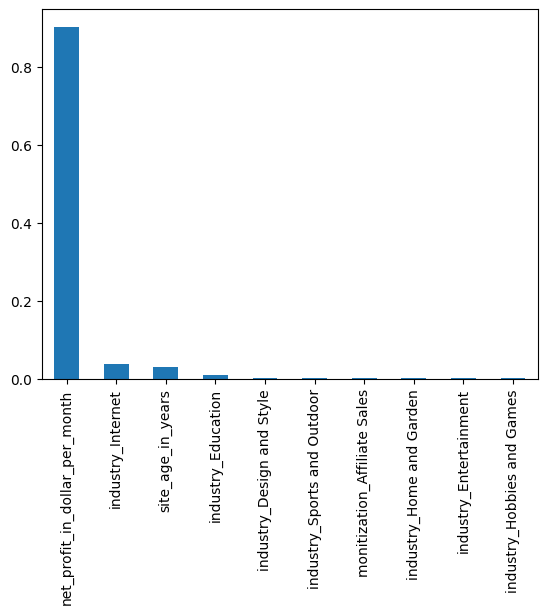

In [ ]:
importances_sorted.head(10).plot.bar();

## Forth Step - Model Training


In [ ]:
combine_df.net_profit_in_dollar_per_month = combine_df.net_profit_in_dollar_per_month.astype("int64")

In [ ]:
combine_df.dtypes

type                              object
industry                          object
monitization                      object
site_age_in_years                  int64
net_profit_in_dollar_per_month     int64
price_in_dollars                   int64
name                              object
selling_method                    object
dtype: object

In [ ]:
data = combine_df[['industry', 'net_profit_in_dollar_per_month','site_age_in_years', 'price_in_dollars']]
data.to_csv("Final dataset.csv", index = False)

In [ ]:
X = combine_df[['industry', 'net_profit_in_dollar_per_month','site_age_in_years']]
X = pd.get_dummies(data=X, drop_first=True)
X.head()

,net_profit_in_dollar_per_month,site_age_in_years,industry_Business,industry_Design and Style,industry_Education,industry_Electronics,industry_Entertainment,industry_Food and Drink,industry_General Knowledge,industry_Health and Beauty,industry_Hobbies and Games,industry_Home and Garden,industry_Internet,industry_Lifestyle,industry_Sports and Outdoor,industry_Travel
0,964,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,12,14,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1183,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,40786,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,150,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
Y = combine_df['price_in_dollars']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.25)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate the regressor
rfreg = RandomForestRegressor()

# Train the regressor on the training data
rfreg.fit(X, Y)

# Make predictions on the test data
pred = rfreg.predict(X_test)

# Evaluate the performance of the regressor on the test data
score = rfreg.score(X_test, y_test)

# Print the score
print("RandomForestRegressor score: {:.2f}".format(score))

RandomForestRegressor score: 0.95
